In [1]:
import pandas as pd
import numpy as np
import ast
from sqlalchemy import create_engine

<body> <p  style = "font-family:georgia,garamond,serif;font-size:15px;text-align:justify"></body>
En la siguiente celda importo cinco clases con sus respectivos métodos que he creado para obtener los resultados de este artículo.  

In [ ]:
from tesis.sustainability_indices import (EquityIndex, EquityIndexUniverse, TestAgainstGroup, 
                                          TestAgainstVariable, YearlyPositionVar)

In [51]:
df_tabe.columns

Index(['EsgScore', 'CombinedScore', 'MarketValueUsd', 'RankpctEsgScore',
       'RankpctCombinedScore', 'RankpctMarketValueUsd', 'return_on_assets',
       'total_liabilities_to_assets', 'additions_fixed_assets_to_assets'],
      dtype='object')

,EsgScore,CombinedScore,MarketValueUsd,RankpctEsgScore,RankpctCombinedScore,RankpctMarketValueUsd,return_on_assets,total_liabilities_to_assets,additions_fixed_assets_to_assets
EsgScore,1.000000,0.801923,0.331533,0.993916,0.797375,0.477098,0.046555,0.174612,-0.051605
CombinedScore,0.801923,1.000000,0.065945,0.808285,0.980688,0.268155,0.041659,0.105405,-0.040366
MarketValueUsd,0.331533,0.065945,1.000000,0.311491,0.068613,0.493303,0.076288,0.078833,-0.024975
RankpctEsgScore,0.993916,0.808285,0.311491,1.000000,0.813409,0.471453,0.048956,0.173912,-0.050578
RankpctCombinedScore,0.797375,0.980688,0.068613,0.813409,1.000000,0.259962,0.046127,0.105139,-0.036710
RankpctMarketValueUsd,0.477098,0.268155,0.493303,0.471453,0.259962,1.000000,0.169077,0.186588,-0.086531
return_on_assets,0.046555,0.041659,0.076288,0.048956,0.046127,0.169077,1.000000,-0.105972,0.007841
total_liabilities_to_assets,0.174612,0.105405,0.078833,0.173912,0.105139,0.186588,-0.105972,1.000000,-0.173031
additions_fixed_assets_to_assets,-0.051605,-0.040366,-0.024975,-0.050578,-0.036710,-0.086531,0.007841,-0.173031,1.000000


<body> <p  style = "font-family:georgia,garamond,serif;font-size:15px;text-align:justify"></body>
En esta celda inicializo las clases que he creado y traigo las especificaciones de los índices que voy a analizar.  Hay dos índices, S&P 400 y Euronext 150, que están en nuestra base de datos, pero decidimos no analizar debido a que son de mediana capitalización y distorsionan el análisis. El uso de clases facilita la replicabilidad y escalabilidad del análisis.

In [3]:
# We make the connection to the database
credentials = ast.literal_eval(open(r"C:\Users\pablo\OneDrive - unizar.es\Python Investigación\credentials.txt", "r").read())
sql_engine = create_engine(credentials['sqlalchemy'][0]+ 'IndexSustainabilityLevel') 
# Information about all the ESG scores and marked value in monthly frecuency covered by our database
universe = EquityIndexUniverse(sql_engine, country_classification = 'WcNation')
# Tables where the results of our hypothesis are stored
regression_exclusion = RegressionExclusions(sql_engine)
regression_inclusion = RegressionInclusions(sql_engine)
# Tables where the results of the hyphotheses (T.Test Barlets Test) of each index are saved
exclusions_maintenances = TestAgainstGroup(sql_engine = sql_engine, nature = "Exclusions") # exclusions against maintenances
inclusions_universe = TestAgainstGroup(sql_engine, "Inclusions") # inclusions against maintenances
exclusions_against = TestAgainstVariable(sql_engine, "Exclusions", "MarketValueUsd") # exclusions csp against exclusions size
inclusions_against = TestAgainstVariable(sql_engine, "Inclusions", "MarketValueUsd") # inclusions csp against exclusions size
# Stored the Rankpct mean and variance of exclusions and inclusions of each index
df_position = YearlyPositionVar(sql_engine) 
# All indices we are going to analize
indices_details = pd.read_sql('EquityIndexDetails', sql_engine)
# We exclude S&P 400 and Euronext 150 --> Two mid cap indices
indices_details= indices_details[~indices_details['Ticker'].isin(['LS&PMIDC', 'LEUNX150'])] 
indices_details

NameError: name 'RegressionExclusions' is not defined

<body> <p  style = "font-family:georgia,garamond,serif;font-size:15px;text-align:justify"></body>
Habría que considerar Inclusión el último mes que una empresa está fuera del índice y no el primer mes que está dentro. O se pueda considerar inclusión el primer mes que la empresa esta fuera del índice y el primer mes que la empresa esta dentro)

In [5]:
for index_ticker, index_market, index_type in indices_details[['Ticker', 'Market', 'Type']].apply(tuple, axis=1):
# get the index composition between dates and assign the attributes
    equity_index = EquityIndex(sql_engine, index_ticker, index_market, index_type, (2007,1,1), (2017,12,31))
    equity_index.get_index_exclusions() # company last month in the index
    equity_index.get_index_inclusions() # company first month in the index
    universe.get_info_from_index(equity_index) # merge equity index information with universe (ESG Scores) 
    universe.get_first_month_out(equity_index.name) # company first month out the index
    universe.get_last_month_out(equity_index.name) # company last month out the index 
# get the percentile rank in monthly basis
    equity_index.get_rankpct_exclusions(universe, restriction="in",old_methodology= False)
    equity_index.get_rankpct_inclusions(universe, restriction="out",old_methodology= False)
# Regression Probit Model
    regression_exclusion.regression(equity_index.name, equity_index.df_rankpct_exclusions)
    regression_inclusion.regression(equity_index.name, equity_index.df_rankpct_inclusions)
# test: inclusions against universe and exclusions against maintenances -->H2a and H2b
    exclusions_maintenances.get_test(equity_index, start_date = (2007,5,30), end_date= (2017,6,30) )
    inclusions_universe.get_test(equity_index, (2007,5,30), (2017,6,30) )
# test: csp against size H3
    exclusions_against.get_test(equity_index, (2007,5,30), (2017,6,30))
    inclusions_against.get_test(equity_index, (2007,6,30), (2017,6,30))
# stored the mean and variance of the rank_percentile of each index
    df_position.get_yearly_position(equity_index, (2007, 6,1), (2017,6,1))
    
# save the results   
regression_exclusion.save(sql_engine)
regression_inclusion.save(sql_engine)
exclusions_maintenances.save(sql_engine)
inclusions_universe.save(sql_engine)
exclusions_against.save(sql_engine)
inclusions_against.save(sql_engine)
df_position.save(sql_engine)

Optimization terminated successfully.
         Current function value: 0.054880
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.031670
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.136103
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.005296
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.100459
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.043279
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132749
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.015621
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.055281
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.055348

In [9]:
regression_exclusion.df_results
regression_inclusion.df_results

,intercept,RankpctEsgScore,RankpctCombinedScore,RankpctMarketValueUsd,return_on_assets,total_liabilities_to_assets,additions_fixed_assets_to_assets,#,R-squared
IndexTicker,,,,,,,,,
LDJSTO50,-38.88**\n(6.427),0.96*\n(0.488),-0.31\n(0.320),36.72**\n(6.468),0.03\n(0.017),0.74\n(0.542),-6.73*\n(2.946),18886.0,0.483
LDJSTOXX,-3.22**\n(0.092),-0.49**\n(0.132),0.48**\n(0.129),1.44**\n(0.093),0.00\n(0.002),0.13\n(0.092),-1.69**\n(0.452),38029.0,0.076
LFAUSAM,-2.88**\n(0.130),-2.61**\n(0.533),2.63**\n(0.524),1.87**\n(0.142),-0.00\n(0.002),-0.13\n(0.119),0.02\n(0.466),5994.0,0.122
LFAWRLD,-2.21**\n(0.048),-0.85**\n(0.169),0.86**\n(0.166),0.70**\n(0.060),0.00**\n(0.001),-0.24**\n(0.059),0.75**\n(0.163),30872.0,0.026
LFT4G100,-20.30**\n(1.848),1.18**\n(0.273),-0.06\n(0.177),17.63**\n(1.893),0.00\n(0.007),0.19\n(0.231),-2.68*\n(1.136),102187.0,0.387
LFT4GBEU,-3.91**\n(0.158),0.32*\n(0.160),0.56**\n(0.141),1.61**\n(0.147),0.01**\n(0.002),0.15\n(0.146),-1.72*\n(0.752),19102.0,0.132
LFT4GBGL,-3.74**\n(0.081),0.85**\n(0.099),0.12\n(0.086),0.88**\n(0.075),0.00\n(0.002),0.18*\n(0.080),-1.37**\n(0.376),96261.0,0.099
LFT4GBUS,-3.68**\n(0.158),0.83**\n(0.197),0.03\n(0.159),1.12**\n(0.165),0.01*\n(0.004),0.08\n(0.160),-1.84*\n(0.761),19700.0,0.123
LFT4U100,-4.59**\n(0.257),0.50*\n(0.234),0.17\n(0.183),2.21**\n(0.297),-0.00\n(0.004),-0.20\n(0.192),-2.69**\n(0.986),37810.0,0.162


In [1]:
import statsmodels.api as sm
def model_metrics(model_results, model_variables):
    df = pd.DataFrame(index=model_variables, 
                      data= {'Coeficients':model_results.params.round(2).to_list(),
                             'Std.Err.': model_results.bse.round(3).to_list(),
                             'P-value':model_results.pvalues.to_list()})
    df = (df['Coeficients'].map('{:.2f}'.format).astype(str) + df['P-value'].apply(significance)
            + "\n" +  df["Std.Err."].map('{:.3f}'.format).astype(str).apply(lambda x:  "("+ x + ")") ).to_frame()
    df = df.T
    df['#'] = model_results.nobs
    df['R-squared'] = model_results.prsquared.round(3)
    return df


def significance(p_val):
    if p_val <=0.05 and p_val > 0.01 :
        significance = "*"
    elif p_val <=0.01 and p_val > 0.001:
        significance = "**"
    elif p_val <=0.001 :
        significance = "**"
    else:
        significance=""
    return significance


class RegressionInclusions(object):

    def __init__(self, sql_engine):
        self.df_accounting = pd.read_sql('YearlyAccounting', sql_engine)
        self.df_results = pd.read_sql('RegressionInclusions', sql_engine)
        self.df_results.set_index('IndexTicker', inplace=True)
        self.x_variables = ['intercept','RankpctEsgScore', 'RankpctCombinedScore', 'RankpctMarketValueUsd', 
                            'return_on_assets', 'total_liabilities_to_assets', 'additions_fixed_assets_to_assets']
    
    def regression(self, index_name, df_rankpct_inclusions):
        df_index = df_rankpct_inclusions.copy()
        df_index['DummyIn']= np.where(df_index[index_name+"LastMonth"] == 'out', 1, 0)
        df_index = df_index.reset_index()
        df_index['YearAccounting']= pd.DatetimeIndex(df_index['MonthlyDate']).year -1
        df_regression = df_index.merge(self.df_accounting,how='inner', left_on=['YearAccounting','IsinCode'],
                                       right_on=['year','isin_code'])
        
        df_regression['intercept'] =1
        x_train = df_regression[['intercept','RankpctEsgScore', 'RankpctCombinedScore', 'RankpctMarketValueUsd', 'return_on_assets', 
                                 'total_liabilities_to_assets', 'additions_fixed_assets_to_assets']]
        y_train = df_regression[['DummyIn']]
#         logit = sm.Logit(y_train, x_train).fit()
        probit = sm.Probit(y_train, x_train).fit()

        df_metrics = model_metrics(probit, x_train.columns)
        df_metrics.index =[index_name] 
        self.df_results = df_metrics.combine_first(self.df_results)
        
    def reset(self, sql_engine):
        pd.DataFrame(columns=['IndexTicker']).to_sql('RegressionInclusions', sql_engine, 
                                                                      index=False, if_exists = "replace")
    def save (self, sql_engine):
        self.df_results.index.name='IndexTicker'
        self.df_results.to_sql('RegressionInclusions', sql_engine, if_exists = "replace", method = 'multi')
   
    
class RegressionExclusions(object):
    
    def __init__(self, sql_engine):
        self.df_accounting = pd.read_sql('YearlyAccounting', sql_engine)
        self.df_results = pd.read_sql('RegressionExclusions', sql_engine)
        self.df_results.set_index('IndexTicker', inplace=True)
        self.x_variables = ['intercept','RankpctEsgScore', 'RankpctCombinedScore', 'RankpctMarketValueUsd', 
                            'return_on_assets', 'total_liabilities_to_assets', 'additions_fixed_assets_to_assets']       
    
    def regression(self, index_name, df_rankpct_exclusions):
        df_index = df_rankpct_exclusions.copy()
        df_index['DummyOut']= np.where(df_index[index_name+"LastMonth"] == 'in', 1, 0)
        df_index = df_index.reset_index()
        df_index['YearAccounting']= pd.DatetimeIndex(df_index['MonthlyDate']).year -1
        df_regression = df_index.merge(self.df_accounting,how='inner', left_on=['YearAccounting','IsinCode'],
                                       right_on=['year','isin_code'])
        
        df_regression['intercept'] =1
        x_train = df_regression[self.x_variables]
        y_train = df_regression[['DummyOut']]
#         logit = sm.Logit(y_train, x_train).fit()
        probit = sm.Probit(y_train, x_train).fit()
        
        df_metrics = model_metrics(probit, x_train.columns)
        df_metrics.index =[index_name] 
        self.df_results = df_metrics.combine_first(self.df_results)
              
    def reset(self, sql_engine):
        pd.DataFrame(columns=['IndexTicker']).to_sql('RegressionExclusions', sql_engine, 
                                                                      index=False, if_exists = "replace")
        
    def save (self, sql_engine):
        self.df_results.index.name='IndexTicker'
        self.df_results.to_sql('RegressionExclusions', sql_engine, if_exists = "replace", method = 'multi')           
    

<body> <p  style = "font-family:georgia,garamond,serif;font-size:15px;text-align:justify"></body>
El tiempo empleado para obtener los resultados para los índices analizados ha sido de menos de 13 minutos. En su momento este mismo análisis en Excel con el ordenador de la facultad, que es más potente que mi ordenador particular, tardaba más de 12 horas. <br>
<br>
En la tabla subyacente aparecen los principales datos relacionados con H2, H3 y H4. Por ahorrar en caracteres he excluido el término “Rankpct” del nombre de las variables.

<body> <p  style = "font-family:georgia,garamond,serif;font-size:15px;text-align:justify"></body>
En la hipótesis 2 y 3 lo que hacemos es comparar si la posición promedia de salidas y entradas es diferente de la posición promedia de mantenimientos y universo. También comparamos si la posición de salidas es inferior a 0.2 y la posición de entradas es mayor a 0.8. <br> <br>
En los diagramas de violín subyacentes se dibuja el comportamiento de cada uno de los índices en cada una de las variables analizadas. Se aprecia como existen ciertas pequeñas diferencias en cada una de las variables entre ambos tipos de índices. Aunque haya pequeñas diferencias no se puede afirmar que realmente estos índices sostenibles sean diferentes a los convencionales. Es por ello por lo que recurrimos a un análisis clúster para ver si realmente existe un grupo de sostenibilidad. El análisis clúster, en función de unas variables, permite agrupar a los índices en función de su similitud.


<body> <p  style = "font-family:georgia,garamond,serif;font-size:15px;text-align:justify"></body>
Nuestra base de datos tiene la forma de la imagen subyacente. Faltaría mejorar la determinación del área geográfica de la compañía mediante la creación de una tabla adicional, aunque no es imprescindible. La forma en que hice en su momento la determinación del área geográfica es excesivamente manual, además creo que el DataType de DataStream utilizado para determinar el área geográfica de la compañía no es el más adecuado para hacer el análisis que realizamos en este trabajo, aunque no creo que esto sea importante. <br><br>
Para aplicar el mismo análisis de nuestro artículo a cualquier otro índice bursátil bastaría con añadirlo a la tabla “EquityIndicesDetail” y añadir sus datos de composición a la tabla “EquityIndicesConstituents”. Para hacer este mismo análisis para otras variables (otros scores) únicamente habría que añadir la información de estas variables en la tabla “CompaniesMonthlyData” y añadir el nombre de la variable en el atributo “variables_analyzed” de la clase EquityIndex. <br>
<br>
Mediante el uso de la biblioteca PyDataStream la actualización de la base de datos de la que se nutre este artículo sería automática o prácticamente automática. Esto permitiría que el análisis que realizamos en este artículo y los datos finales que obtemos de posición de entradas y salidas se pueda ofrecer de forma periódica o colgar en una web
 

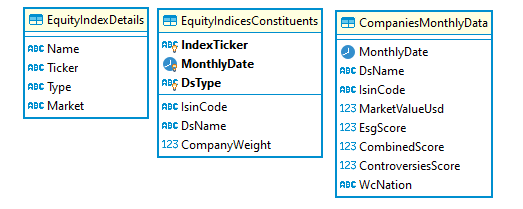

In [12]:
# Reset the tables with the results
# exclusions_maintenances.reset(sql_engine)
# inclusions_universe.reset(sql_engine)
# inclusions_against.reset(sql_engine)
# exclusions_against.reset(sql_engine)
# df_position.reset(sql_engine)

In [4]:
import pandas as pd
import numpy as np
import datetime
import ast

from sqlalchemy import create_engine
from scipy import stats
from dateutil import relativedelta

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# In order to assing the "*" of significance
def significance(p_val):
    if p_val <=0.05 and p_val > 0.01 :
        significance = "*"
    elif p_val <=0.01 and p_val > 0.001:
        significance = "**"
    elif p_val <=0.001 :
        significance = "**"
    else:
        significance=""
    return significance


class EquityIndex(object):
    
    column_date = "MonthlyDate"
    column_company_id = "IsinCode"
    variables_analyzed = ['EsgScore', 'CombinedScore', 'MarketValueUsd'] # 'ESG Controversies Score'
    
    def __init__(self, sql_engine, index_name, index_market, index_type, start_date, end_date):     
        
        self.name = index_name
        self.geographic_area = [index_market]
        self.type = index_type   
        # select the index composition data
        sql_query = """
            SELECT "IsinCode", "MonthlyDate", "CompanyWeight"
            FROM "EquityIndicesConstituents"
            WHERE ("IndexTicker" = '%s') AND ("MonthlyDate" BETWEEN '%s' AND '%s')
            ORDER BY "MonthlyDate"
            """ % (self.name, datetime.date(*start_date), datetime.date(*end_date) )
        
        self.df_index = pd.read_sql(sql_query, sql_engine) 
        self.df_index[self.name] = "constituent" # Create a column used when merge index information with ESG score
        
    
    # We create the column ("last_month") ->"in" identifies the companies that will dissapear next month
    def get_index_exclusions(self):   
        def companies_next_month(company_id): # if the company_id is not in the index next month then exclusion 
            if company_id in companies_ids_compare:
                return np.nan 
            else:
                return "in" 
        
        analyzed_dates = sorted( list(set(self.df_index[self.column_date])) ) # unique dates in the index sorted
        for fecha in analyzed_dates[:-1]: # the last date can not be anlyze
            fecha_compare = analyzed_dates[analyzed_dates.index(fecha)+1] # next month date
            companies_ids_compare = list( set(self.df_index[self.df_index[self.column_date] == fecha_compare][
                self.column_company_id]) )# ids of companies that are in the index next month
            
            # if the ids are not next month then is the last month of the company in the index -->assing company "in" label
            self.df_index.loc[self.df_index[self.column_date] == fecha, self.name + "LastMonth"] = self.df_index[
                self.df_index[self.column_date] == fecha][self.column_company_id].apply(companies_next_month) 
            
    # We create a column ("first_month") in identifies the companies that is its first month in the index       
    def get_index_inclusions(self):   
        def companies_last_month(company_id): # if the id was not last month then is inclusion 
            if company_id in companies_ids_compare:
                return np.nan
            else:
                return "in" 

        analyzed_dates = sorted( list(set(self.df_index[self.column_date])) ) # unique dates in the index sorted
        for fecha in analyzed_dates[1:]: # the first date can not be anlyze
            fecha_compare = analyzed_dates[analyzed_dates.index(fecha)-1] # last month date
            companies_ids_compare = list( set(self.df_index[self.df_index[self.column_date] == fecha_compare][
                self.column_company_id]) )# ids of companies that were in the index last month
            # if the ids were not last month then is the first month of the company in the index -->assing company "in" label
            self.df_index.loc[self.df_index[self.column_date] == fecha, self.name + "FirstMonth"] = self.df_index[
                self.df_index[self.column_date] == fecha][self.column_company_id].apply(companies_last_month) 
            
            
    def get_rankpct_exclusions(self, EquityIndexUniverse, restriction, old_methodology= False):
        
        self.df_rankpct_exclusions = pd.DataFrame()
        # exclusion values can be measured at two different times
        if restriction == "out":
            on_column = "FirstMonth"            
        elif restriction == "in":
            on_column = "LastMonth"
        else:
            raise  ValueError("restriction should be: in or out")
            
        self.exclusions_column =on_column
        self.exclusions_restriction = restriction 
            
        # to obtain the rank percentile we focus on exclusions + companies in the index (constituents)
        self.df_rankpct_exclusions = EquityIndexUniverse.df_universe.loc[ (EquityIndexUniverse.df_universe[
            self.name + on_column]==restriction)|(EquityIndexUniverse.df_universe[self.name] == "constituent"),
                EquityIndex.variables_analyzed+ [self.name, self.name + "FirstMonth", self.name + "LastMonth"] +[
                    EquityIndexUniverse.column_company_country ] ] # [self.name "FirstMonth" ... select only these columns]
        
        # We employ the same criteria that in the first article version
        if old_methodology == True:        
            self.df_rankpct_exclusions = self.df_rankpct_exclusions[(self.df_rankpct_exclusions[
                self.name + "FirstMonth"]!="in") ]
            
        # We only analyze the maintenances in the same dates that there exist exclusions
        dates = list(self.df_rankpct_exclusions.loc[self.df_rankpct_exclusions[self.name + on_column] == 
                                               restriction].index.get_level_values(1) )
        self.df_rankpct_exclusions = self.df_rankpct_exclusions.loc[
            self.df_rankpct_exclusions.index.get_level_values(1).isin(dates)]

        
        # get the percentile rank 
        for variable in EquityIndex.variables_analyzed:
            self.df_rankpct_exclusions["Rankpct" + variable] = self.df_rankpct_exclusions.groupby(
                [EquityIndexUniverse.primary_key[1]])[ variable].rank( method ="min")
            self.df_rankpct_exclusions["Rankpct" + variable] = self.df_rankpct_exclusions.groupby([
                EquityIndexUniverse.primary_key[1]])["Rankpct" + variable].apply(lambda x: (x-1)/(x.count()-1) )
           
            
    def get_rankpct_inclusions(self, EquityIndexUniverse, restriction, old_methodology= False):
        
        self.df_rankpct_inclusions = pd.DataFrame()
        # inclusion values can be measured at two different times
        if restriction == "in" :
            on_column = "FirstMonth"         
        elif restriction == "out":
            on_column = "LastMonth"
        else:
            raise  ValueError("restriction should be: in or out")
            
        self.inclusions_column =on_column
        self.inclusions_restriction = restriction 
            
        # to obtain the rank percentile we focus on each inclusions + companies in the same geogrphic are and not in the index
        if self.geographic_area[0] == "Global":
            self.df_rankpct_inclusions = EquityIndexUniverse.df_universe.loc[ 
                  (EquityIndexUniverse.df_universe[self.name] !="constituent")| (
                     EquityIndexUniverse.df_universe[self.name + on_column] == restriction), EquityIndex.variables_analyzed +[
                      self.name, self.name + "FirstMonth", self.name + "LastMonth"] +[
                     EquityIndexUniverse.column_company_country ] ]     
        else:
            self.df_rankpct_inclusions = EquityIndexUniverse.df_universe.loc[ 
                 (EquityIndexUniverse.df_universe[EquityIndexUniverse.column_company_country].isin(self.geographic_area)) & (
                     EquityIndexUniverse.df_universe[self.name] !="constituent")| (
                     EquityIndexUniverse.df_universe[self.name + on_column] == restriction), EquityIndex.variables_analyzed +[
                      self.name, self.name + "FirstMonth", self.name + "LastMonth"] +[
                     EquityIndexUniverse.column_company_country ] ]
        
     # We employ the same criteria that in the first article version
        if old_methodology == True:  
            self.df_rankpct_inclusions = self.df_rankpct_inclusions[ (self.df_rankpct_inclusions[
                self.name+ 'FirstMonth']!='out') ]
            
        # We only analyze the maintenances in the same dates that there exist exclusions
        dates = list(self.df_rankpct_inclusions.loc[self.df_rankpct_inclusions[self.name + on_column] == 
                                               restriction].index.get_level_values(1) )
        self.df_rankpct_inclusions = self.df_rankpct_inclusions.loc[
            self.df_rankpct_inclusions.index.get_level_values(1).isin(dates)]


        for variable in EquityIndex.variables_analyzed:
            self.df_rankpct_inclusions["Rankpct" + variable] = self.df_rankpct_inclusions.groupby(
                [EquityIndexUniverse.primary_key[1]])[variable].rank( method ="min")
            self.df_rankpct_inclusions["Rankpct" + variable] = self.df_rankpct_inclusions.groupby([
                EquityIndexUniverse.primary_key[1]])["Rankpct" + variable].apply(lambda x: (x-1)/(x.count()-1) )

                        
class EquityIndexUniverse (object):
    
    primary_key = ("IsinCode", "MonthlyDate")
    
    
    def __init__(self, sql_engine, country_classification):
        import pandas as pd
        
        self.column_company_country = country_classification
        self.df_universe = pd.read_sql('CompaniesMonthlyData', sql_engine)
        self.df_universe.set_index(list(self.primary_key), inplace=True)
        
        
    # merge the composition information of the index with the monthly ESG scores (universe ESG scores)
    def get_info_from_index(self, EquityIndex):
        df_index = EquityIndex.df_index.drop_duplicates(subset=[EquityIndex.column_company_id, EquityIndex.column_date])
        # we merge the information by the index so the name of both indexes level have to be the same
        df_index = df_index.set_index([EquityIndex.column_company_id, EquityIndex.column_date])
        df_index.index.set_names([*self.primary_key], inplace = True)
        # we are only interested in three columns
        df_index = df_index.loc[:, [EquityIndex.name, EquityIndex.name + "LastMonth", EquityIndex.name +"FirstMonth"]]
        
    # if the name of the index is in the dataframe then combine first else merge// Only merge the isins that are in universe
        if EquityIndex.name in self.df_universe.columns:
            df_index = df_index.loc[df_index.index.intersection([*(self.df_universe.index)]) ]
            self.df_universe = self.df_universe.combine_first(df_index) 
        else:
            self.df_universe = self.df_universe.merge(df_index, how="left", on= list(self.primary_key) ) 
        
    # the first month that company was out of the index
    def get_last_month_out(self, index_name):
        # We create a dataframe with the date and isin that indicates the first month that company was out of the index            
        # We select the date ans ISIN that indentifiy the first time that a company was in the index
        last_month_out =self.df_universe.reset_index()
        last_month_out =last_month_out.loc[ last_month_out[index_name + "FirstMonth"]== "in", 
                                           list(self.primary_key) ]
        # We subtract one month to those dates
        last_month_out[self.primary_key[1] ]=last_month_out[self.primary_key[1] ].apply(
            lambda x: x +relativedelta.relativedelta(months=-1))
        # We create a column (index.name + "_last_month") indicating the last month that a company was out of the index
        last_month_out[index_name + "LastMonth"]= "out"
        last_month_out.set_index( list(self.primary_key), inplace= True)
        # only the dates and companis with score in df_universe (our esg scores database)
        last_month_out = last_month_out.loc[last_month_out.index.intersection([*(self.df_universe.index)])]
        # We update the column  (index.name + "_last_month") of df_universe
        self.df_universe= self.df_universe.combine_first(last_month_out)
        
    def get_first_month_out(self, index_name):
        # We create a dataframe with the date and isin that indicates the first month that a company was out of the index
        
        # We select the date ans ISIN that indentifiy the last time that a company was in the index
        first_month_out =self.df_universe.reset_index()
        first_month_out =first_month_out.loc[ first_month_out[index_name + "LastMonth"] == "in", 
                                             list(self.primary_key) ]
        # We add one month to those dates
        first_month_out[self.primary_key[1]]=first_month_out[self.primary_key[1]].apply(
            lambda x: x +relativedelta.relativedelta(months=+1))
        # We create a column (index.name + "_first_month") indicating the first month that a company was out of the index
        first_month_out[index_name+  "FirstMonth"]= "out"
        first_month_out.set_index(list(self.primary_key), inplace= True)        
        # only the dates with score in df_universe (our esg scores database)
        first_month_out = first_month_out.loc[first_month_out.index.intersection([*(self.df_universe.index)])]
        # We update the column  (index.name + "_first_month") of df_universe
        self.df_universe= self.df_universe.combine_first(first_month_out)

        
class TestAgainstGroup (object):
    
    def __init__(self, sql_engine, nature):
                
        # to see if the test is inclusions against universe or exclusions egainst maintenances
        self.nature = nature
        if nature == "Inclusions":
            self.other = "Universe"
            self.percentile = 0.8
            self.percentile_label = "(2)H0: μ1 ≤" + str(self.percentile)  # the ≤ changes between inclusions and exclusions 
        elif nature == "Exclusions":
            self.other = "Maintenances"
            self.percentile = 0.2
            self.percentile_label ="(2)H0: μ1 ≥" + str(self.percentile)
        else:
            raise ValueError("nature should be: Inclusions or Exclusions")
        # Read the table from database    
        self.df_test = pd.read_sql(self.nature + 'AgainstGroup', con = sql_engine)
        self.df_test.set_index(['level_0', 'level_1', 'level_2'], inplace = True) 

    # restart the dataframe df_test_inclusions 
    def reset(self, sql_engine):
        # We create the index with the headers that will in the table
        column_index = pd.MultiIndex.from_product([EquityIndex.variables_analyzed,[self.nature, self.other],["mean"]]).append(
            pd.MultiIndex.from_product([EquityIndex.variables_analyzed,['Test'],["(1)H0: μ1 = μ2",self.percentile_label]])) 
        column_index= column_index.append(pd.MultiIndex.from_product([["obs"], [self.nature, self.other],["#"]]) )
        column_index= column_index.append(pd.MultiIndex.from_product([[""], [""],["type"]]) )
        self.df_test = pd.DataFrame(index= column_index).reindex(EquityIndex.variables_analyzed+ ["obs", ""],
                                                                       level=0, axis=0)        
        self.df_test.to_sql(self.nature + 'AgainstGroup', con = sql_engine, if_exists = "replace", method = 'multi')
        self.df_test= pd.read_sql(self.nature + 'AgainstGroup', con = sql_engine)
        self.df_test.set_index(['level_0', 'level_1', 'level_2'], inplace = True)
          
        # We apply the test of the paper to see differences between inclusions and universe
    def get_test(self, EquityIndex, start_date, end_date): 

       # We select the correct df_rankpct     
        if self.nature == "Inclusions":
            df_rankpct = EquityIndex.df_rankpct_inclusions.copy()
            on_column = EquityIndex.inclusions_column
            restriction = EquityIndex.inclusions_restriction
        if self.nature == "Exclusions":
            df_rankpct = EquityIndex.df_rankpct_exclusions.copy()
            on_column = EquityIndex.exclusions_column
            restriction = EquityIndex.exclusions_restriction       

        # we select the dates that interest us
        df_rankpct = df_rankpct[ df_rankpct.index.get_level_values(1)>= datetime.datetime(*start_date)].copy()
        df_rankpct = df_rankpct[df_rankpct.index.get_level_values(1)<= datetime.datetime(*end_date)].copy()

        for variable in EquityIndex.variables_analyzed:
    # filer to get the values of each variable we are interested in (inclusions & universe // exclusions & maintenances)
            nature_vector = df_rankpct.loc[df_rankpct[ EquityIndex.name + on_column]== restriction, ["Rankpct" + variable]]
            nature_vector = nature_vector["Rankpct" + variable].tolist() # exclusions / inclusions vector
            other_vector = df_rankpct.loc[df_rankpct[EquityIndex.name + on_column] != restriction, ["Rankpct"+variable]]
            other_vector = other_vector["Rankpct" + variable].tolist()

            # nature mean --> inclusion or exclusion mean
            self.df_test.at[(variable, self.nature,'mean'), EquityIndex.name]=str(
                np.round(np.mean(nature_vector),3))
            # other mean --> universe or maintenances
            self.df_test.at[(variable, self.other,'mean'), EquityIndex.name]=str(
                np.round(np.mean(other_vector),3))
            # T-test of mean differences between two samples: inclusions group = universe group
            variance_test = stats.bartlett(nature_vector, other_vector)
            equal_var = True if variance_test[1] > 0.05 else False
            mean_two_stat, mean_two_p = stats.ttest_ind(nature_vector, other_vector, equal_var=equal_var)
            self.df_test.at[(variable, 'Test', "(1)H0: μ1 = μ2"), EquityIndex.name] =(
                                                    str(np.round(mean_two_stat,1)) + significance(mean_two_p) )
            # T-test of one sample: universe_mean > or < than self.percentile
            mean_one_stat, mean_one_p = stats.ttest_1samp(nature_vector, self.percentile) # (x-mu)/(S/raiz(N-1))
            mean_one_p = stats.t.cdf(mean_one_stat, df= len(nature_vector) - 1)
            mean_one_p = 1- mean_one_p if self.nature == "Inclusions" else mean_one_p
            self.df_test.at[(variable, 'Test', self.percentile_label), EquityIndex.name] =(
                                                    str(np.round(mean_one_stat,1)) + significance(mean_one_p) )
        # number of inclusions 
        self.df_test.at[('obs', self.nature, "#"), EquityIndex.name] = str(len(nature_vector))
        self.df_test.at[('obs', self.other, "#"), EquityIndex.name] = str(len(other_vector)) 
        # type of index 
        self.df_test.at[("", "","type"), EquityIndex.name] = EquityIndex.type
        
    # save the df into the database
    def save(self, sql_engine): 
        self.df_test.to_sql(self.nature + 'AgainstGroup', con = sql_engine, if_exists = "replace", method = 'multi',
                           chunksize=100000)
        

class TestAgainstVariable (object):
    
    def __init__(self, sql_engine, nature, variable_against):
        
        self.variable_against = variable_against
        self.nature = nature
        if nature == "Inclusions":
            pass
        elif nature == "Exclusions":
            pass
        else:
            raise ValueError("nature should be: Inclusions or Exclusions")
        
        self.df_test = pd.read_sql(self.nature + 'AgainstVariable', con = sql_engine)
        self.df_test.set_index(['level_0', 'level_1', 'level_2'], inplace = True)

    def reset(self, sql_engine):

        # We create the index with the headers that will in the table
        column_index = pd.MultiIndex.from_product([EquityIndex.variables_analyzed,[self.nature],["var", "mean"]]).append(
          pd.MultiIndex.from_product([ list(set(EquityIndex.variables_analyzed) - set([self.variable_against])), 
                                      ['Test'],["(1)H0:σ2S = σ2CSP", "(2)H0:μS = μCSP"]])) 
        column_index= column_index.append(pd.MultiIndex.from_product([["obs"], [self.nature],["#"]]) )
        column_index= column_index.append(pd.MultiIndex.from_product([[""], [""],["type"]]) )
        self.df_test = pd.DataFrame(index= column_index).reindex( [self.variable_against] +list(
            set(EquityIndex.variables_analyzed) - set([self.variable_against])) + ["obs", ""] , level=0, axis=0)      
        
        self.df_test.to_sql(self.nature + 'AgainstVariable', con = sql_engine, if_exists = "replace", 
                                         method = 'multi')
        self.df_test= pd.read_sql(self.nature + 'AgainstVariable', con = sql_engine)
        self.df_test.set_index(['level_0', 'level_1', 'level_2'], inplace = True)
          
    # We apply the test of the paper to see differences in inclsuions between size and csp
    def get_test(self, EquityIndex, start_date, end_date):    
     
       # We select the correct df_rankpct     
        if self.nature == "Inclusions":
            df_rankpct = EquityIndex.df_rankpct_inclusions.copy()
            on_column = EquityIndex.inclusions_column
            restriction = EquityIndex.inclusions_restriction
        if self.nature == "Exclusions":
            df_rankpct = EquityIndex.df_rankpct_exclusions.copy()
            on_column = EquityIndex.exclusions_column
            restriction = EquityIndex.exclusions_restriction 

        # we select the dates that interest us
        df_rankpct = df_rankpct[ ( df_rankpct.index.get_level_values(1)>= datetime.datetime(*start_date) ) &(
            df_rankpct.index.get_level_values(1)<= datetime.datetime(*end_date) )].copy()

        # the variable against
        against_vector=df_rankpct.loc[df_rankpct[EquityIndex.name + on_column]== restriction,[
            "Rankpct" + self.variable_against]]
        against_vector = against_vector["Rankpct" + self.variable_against].tolist()
        # variable_against mean and var
        self.df_test.at[(self.variable_against, self.nature, "mean"), EquityIndex.name] = (
        str(np.round(np.mean(against_vector),3)) )
        self.df_test.at[(self.variable_against, self.nature, "var"), EquityIndex.name] = (
        str(np.round(np.var(against_vector), 3)) )
        # observations --> number of inclusions
        self.df_test.at[('obs', self.nature, "#"), EquityIndex.name] = str(len(against_vector))
        
        # size position against csp position
        for variable in EquityIndex.variables_analyzed:
            if self.variable_against == variable:
                continue # we are not interested in compare for example size against size 
            # filer to get the values of each variable we are interested in
            other_vector=df_rankpct.loc[df_rankpct[EquityIndex.name +on_column]== restriction,["Rankpct" + variable]]
            other_vector = other_vector["Rankpct" + variable].tolist()
            # other_vector mean and var
            self.df_test.at[(variable,self.nature,'mean'),EquityIndex.name]=str(np.round(np.mean(other_vector),3))
            self.df_test.at[(variable,self.nature,'var'),EquityIndex.name]=str(np.round(np.var(other_vector),3))
            # Test of  different variances between two samples:
            variance_stat, variance_p = stats.bartlett(against_vector, other_vector)
            self.df_test.at[(variable, 'Test', "(1)H0:σ2S = σ2CSP"), EquityIndex.name] =(
                                                    str(np.round(variance_stat,1)) + significance(variance_p) )
            # T-test of mean differences between two samples: e.g. csp_inclusions_position = size_inclusions_position
            equal_var = True if variance_p > 0.05 else False
            mean_stat, mean_p = stats.ttest_ind(against_vector, other_vector, equal_var=equal_var)
            self.df_test.at[(variable, 'Test', "(2)H0:μS = μCSP"), EquityIndex.name] =(
                                                    str(np.round(mean_stat,1)) + significance(mean_p) )
        # we add information about the type of index
        self.df_test.at[('', '', 'type'), EquityIndex.name] = EquityIndex.type

    def save(self, sql_engine): 
        self.df_test.to_sql(self.nature + 'AgainstVariable', con = sql_engine, if_exists = "replace", method = 'multi',
                           chunksize = 100000)  

        
class YearlyPositionVar(object):
    
    def __init__(self, sql_engine):
        self.df_position = pd.read_sql('YearlyPositionVar', sql_engine)
        self.df_position.set_index(['IndexTicker', 'Year'], inplace=True)
        
    def get_yearly_position(self, EquityIndex, start_date, end_date):
                    
        start_date = datetime.datetime(*start_date)
        end_date = datetime.datetime(*end_date)
        # get the exclusion postion between dates 
        df_rankpct_exclusions = EquityIndex.df_rankpct_exclusions.copy()
        df_rankpct_exclusions = df_rankpct_exclusions.loc[(df_rankpct_exclusions.index.get_level_values(1) >= start_date) &
                                                (df_rankpct_exclusions.index.get_level_values(1) <= end_date) &
                                                (df_rankpct_exclusions[EquityIndex.name +EquityIndex.exclusions_column]==
                                                 EquityIndex.exclusions_restriction)]
        # get the inclusion postion between dates 
        df_rankpct_inclusions = EquityIndex.df_rankpct_inclusions.copy()
        df_rankpct_inclusions = df_rankpct_inclusions.loc[(df_rankpct_inclusions.index.get_level_values(1) >= start_date) &
                                                (df_rankpct_inclusions.index.get_level_values(1) <= end_date) &
                                                (df_rankpct_inclusions[EquityIndex.name +EquityIndex.inclusions_column]==
                                                 EquityIndex.inclusions_restriction)]
                       
        for year in range(start_date.year, end_date.year + 1):
            # filter to get the year exclusions
            df_rankpct_year_exclusions = df_rankpct_exclusions.loc[
                                            (df_rankpct_exclusions.index.get_level_values(1).year == year)]   
            df_rankpct_year_inclusions = df_rankpct_inclusions.loc[
                                            (df_rankpct_inclusions.index.get_level_values(1).year == year)]
            # get the yearly mean and variance of inclusions and exclusions of each index
            self.get_statistics(df_rankpct_year_exclusions, 'Exclusions', year, EquityIndex)
            self.get_statistics(df_rankpct_year_exclusions, 'Inclusions', year, EquityIndex)
            
        # get the position and var for all period
        self.get_statistics(df_rankpct_exclusions, 'Exclusions', 'All period', EquityIndex)
        self.get_statistics(df_rankpct_inclusions, 'Inclusions', 'All period', EquityIndex)
          
    def get_statistics(self, df, nature, year, EquityIndex):
            # get the mean and variance of the rank percnetile variables
            for variable in ['Rankpct'+ variable for variable in EquityIndex.variables_analyzed]:
                self.df_position.at[(EquityIndex.name, str(year)), variable[7:]+ nature +'Mean'] = df[variable].mean()
                self.df_position.at[(EquityIndex.name, str(year)), variable[7:]+ nature +'Var'] = df[variable].var()
                
            self.df_position.at[(EquityIndex.name, str(year)), "Num" + nature] = df[variable].count()             
            self.df_position.at[(EquityIndex.name, str(year)),'IndexMarket']= EquityIndex.geographic_area[0]
            self.df_position.at[(EquityIndex.name, str(year)),'IndexType'] = EquityIndex.type
          
    def reset(self, sql_engine):

        # We create the index with the headers that will in the table
        self.df_test = pd.DataFrame(columns =['IndexTicker', 'Year'] )      
        self.df_test.to_sql('YearlyPositionVar', con = sql_engine, if_exists = "replace", method = 'multi', index=False)
        self.df_test= pd.read_sql('YearlyPositionVar', con = sql_engine)
        self.df_test.set_index(['IndexTicker', 'Year'], inplace = True)    
    
    def save(self, sql_engine):
        self.df_position.to_sql('YearlyPositionVar', sql_engine, if_exists = 'replace', index = True)

<a href="https://towardsdatascience.com/sql-window-functions-in-python-pandas-data-science-dc7c7a63cbb4"> Complete SQL instructions in pandas</a> <br>
<a href="https://www.rbtechblog.com/blog/deploy_bokeh_app"> Bokeh app into web server <br>

In [ ]:
    #https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
# working with return https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
# https://towardsdatascience.com/python-for-finance-stock-portfolio-analyses-6da4c3e61054   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns

vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]


a = sm.Probit.from_formula(""" DummyOut ~RankpctEsgScore + RankpctCombinedScore + RankpctMarketValueUsd + return_on_assets + 
                         total_liabilities_to_assets + additions_fixed_assets_to_assets""", df_regression).fit()

df_accounting['date_to_index']=pd.DatetimeIndex(df_accounting['end_fiscal_period']) #+pd.offsets.DateOffset(years=1, months=0)
df = df_accounting.set_index('date_to_index').groupby('isin_code').resample('M').bfill()
df_index['Year'] = df_index['MonthlyDate'].dt.to_period('M')